# Identifying and Recommending Best Restaurants

In [1]:
# Importing The Libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_data= pd.read_excel(r"C:\Users\Ajit\Desktop\Projects\Identifying Resturants Project\data.xlsx")    #importing the data file

In [3]:
df_data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243


In [4]:
df_CountryCode=pd.read_excel(r"C:\Users\Ajit\Desktop\Projects\Identifying Resturants Project\Country-Code.xlsx")  
#importing the 2nd data file

In [5]:
 df_restaurants=pd.merge(df_data,df_CountryCode,on="Country Code",how="left")         #merging the two data sets

In [6]:
df_restaurants.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,Indonesia
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873,Indonesia
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605,Indonesia
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395,Indonesia
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243,Indonesia


## Performing preliminary data inspection and report the findings as the structure of the data, missing values, duplicates, etc.

In [7]:
df_restaurants.shape

(9551, 20)

In [8]:
df_restaurants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9550 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Price range           9551 non-null   int64  
 15  Aggregate rating     

In [9]:
df_restaurants.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Price range', 'Aggregate rating',
       'Rating color', 'Rating text', 'Votes', 'Country'],
      dtype='object')

In [10]:
df_restaurants.columns = df_restaurants.columns.str.replace(' ','_')
df_restaurants.columns

Index(['Restaurant_ID', 'Restaurant_Name', 'Country_Code', 'City', 'Address',
       'Locality', 'Locality_Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average_Cost_for_two', 'Currency', 'Has_Table_booking',
       'Has_Online_delivery', 'Price_range', 'Aggregate_rating',
       'Rating_color', 'Rating_text', 'Votes', 'Country'],
      dtype='object')

In [11]:
df_restaurants.isnull().sum()

Restaurant_ID           0
Restaurant_Name         1
Country_Code            0
City                    0
Address                 0
Locality                0
Locality_Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average_Cost_for_two    0
Currency                0
Has_Table_booking       0
Has_Online_delivery     0
Price_range             0
Aggregate_rating        0
Rating_color            0
Rating_text             0
Votes                   0
Country                 0
dtype: int64

In [12]:
df_restaurants[df_restaurants["Restaurant_Name"].isnull()]

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country
1646,113702,NaN,1,Ahmedabad,"Opposite Sindhu Bhawan, Bodakdev, Ahmedabad",Bodakdev,"Bodakdev, Ahmedabad",72.501764,23.040163,"North Indian, Continental, Mexican, Italian",800,Indian Rupees(Rs.),No,No,3,4.1,Green,Very Good,769,India


In [13]:
df_restaurants.dropna(subset=["Restaurant_Name"],inplace=True)

In [14]:
df_restaurants[df_restaurants["Cuisines"].isnull()]

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country
9083,17374552,Corkscrew Cafe,216,Gainesville,"51 W Main St, Dahlonega, GA 30533",Dahlonega,"Dahlonega, Gainesville",-83.985800,34.531800,NaN,40,Dollar($),No,No,3,3.9,Yellow,Good,209,United States
9086,17501439,Dovetail,216,Macon,"543 Cherry St, Macon, GA 31201",Macon,"Macon, Macon",-83.627979,32.836410,NaN,40,Dollar($),No,No,3,3.8,Yellow,Good,102,United States
9094,17059060,Hillstone,216,Orlando,"215 South Orlando Avenue, Winter Park, FL 32789",Winter Park,"Winter Park, Orlando",-81.365260,28.596682,NaN,40,Dollar($),No,No,3,4.4,Green,Very Good,1158,United States
9406,17284158,Jimmie's Hot Dogs,216,Albany,"204 S Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.153400,31.575100,NaN,10,Dollar($),No,No,1,3.9,Yellow,Good,160,United States
9494,17142698,Leonard's Bakery,216,Rest of Hawaii,"933 Kapahulu Ave, Honolulu, HI 96816",Kaimuki,"Kaimuki, Rest of Hawaii",-157.813432,21.284586,NaN,10,Dollar($),No,No,1,4.7,Dark Green,Excellent,707,United States
9504,17616465,Tybee Island Social Club,216,Savannah,"1311 Butler Ave, Tybee Island, GA 31328",Tybee Island,"Tybee Island, Savannah",-80.848297,31.995810,NaN,10,Dollar($),No,No,1,3.9,Yellow,Good,309,United States
9533,17284105,Cookie Shoppe,216,Albany,"115 N Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.154000,31.577200,NaN,0,Dollar($),No,No,1,3.4,Orange,Average,34,United States
9535,17284211,Pearly's Famous Country Cookng,216,Albany,"814 N Slappey Blvd, Albany, GA 31701",Albany,"Albany, Albany",-84.175900,31.588200,NaN,0,Dollar($),No,No,1,3.4,Orange,Average,36,United States
9539,17606621,HI Lite Bar & Lounge,216,Miller,"109 N Broadway Ave, Miller, SD 57362",Miller,"Miller, Miller",-98.989100,44.515800,NaN,0,Dollar($),No,No,1,3.4,Orange,Average,11,United States


In [15]:
df_restaurants["Cuisines"].fillna('Others',inplace=True)

In [16]:
df_restaurants.shape

(9550, 20)

In [17]:
df_restaurants.duplicated().sum()

0

In [18]:
df_restaurants.to_excel(r"C:\Users\Ajit\Desktop\Projects\Identifying Resturants Project\comb_data.xlsx", index = False)

## Exploring the geographical distribution of the restaurants and identify the cities with the maximum and minimum number of restaurants

In [19]:
df_country= df_restaurants.groupby(['Country_Code','Country']).agg(Count = ('Restaurant_ID','count'))

In [20]:
df_country

,,Count
Country_Code,Country,
1,India,8651
14,Australia,24
30,Brazil,60
37,Canada,4
94,Indonesia,21
148,New Zealand,40
162,Phillipines,22
166,Qatar,20
184,Singapore,20


In [21]:
df_country.sort_values(by='Count',ascending=True)

,,Count
Country_Code,Country,
37,Canada,4
166,Qatar,20
184,Singapore,20
191,Sri Lanka,20
94,Indonesia,21
162,Phillipines,22
14,Australia,24
208,Turkey,34
148,New Zealand,40


In [22]:
df_city = df_restaurants.groupby(['Country','City']).agg(Count = ('Restaurant_ID','count'))

In [23]:
df_city.

Count
Country   City               
Australia Armidale          1
          Balingup          1
          Beechworth        1
          Dicky Beach       1
          East Ballina      1

In [24]:
df_city.sort_values(by='Count',ascending=False)   

Count
Country       City                 
India         New Delhi        5473
              Gurgaon          1118
              Noida            1080
              Faridabad         251
              Ghaziabad          25
...                             ...
              Panchkula           1
Australia     Balingup            1
Indonesia     Bandung             1
Phillipines   Quezon City         1
United States Winchester Bay      1

[141 rows x 1 columns]

## <font color=green> New Delhi has the maximum number of restaurants, 5473.</font>

In [25]:
city_min_rest = df_city[df_city['Count']==1]
city_min_rest.count()                   # 46 Cities have  min no.of restaurants which is 1.

Count    46
dtype: int64

## <font color=green> 46 Cities have minimum number of restaurants which is 1.</font>

## Creating a dataframe having min. and max rating of restaurant in each country and city

In [26]:
max_rating = df_restaurants.sort_values(by='Aggregate_rating',ascending=False).groupby(['Country','City'],as_index=False).first()
df_max_rating=max_rating[["Country","City","Restaurant_Name","Aggregate_rating"]]
df_max_rating.head()

,Country,City,Restaurant_Name,Aggregate_rating
0,Australia,Armidale,Whitebull Hotel,3.5
1,Australia,Balingup,Taste of Balingup,3.2
2,Australia,Beechworth,Bridge Road Brewers,4.6
3,Australia,Dicky Beach,The Giggling Goat,3.6
4,Australia,East Ballina,The Belle General,4.1


In [27]:
min_rating = df_restaurants.sort_values(by='Aggregate_rating',ascending=False).groupby(['Country','City'],as_index=False).last()
df_min_rating=min_rating[['Country','City','Restaurant_Name','Aggregate_rating']]
df_min_rating

,Country,City,Restaurant_Name,Aggregate_rating
0,Australia,Armidale,Whitebull Hotel,3.5
1,Australia,Balingup,Taste of Balingup,3.2
2,Australia,Beechworth,Bridge Road Brewers,4.6
3,Australia,Dicky Beach,The Giggling Goat,3.6
4,Australia,East Ballina,The Belle General,4.1
...,...,...,...,...
136,United States,Valdosta,El Toreo Mexican Restaurant,3.1
137,United States,Vernonia,Blue House Cafe,4.3
138,United States,Waterloo,Masala Grill & Coffee House,3.2
139,United States,Weirton,Theo Yianni's Authentic Greek Restaurant,3.9


In [28]:
rating=df_max_rating.merge(df_min_rating,left_on='City',right_on='City',how='inner')
rating.head()

,Country_x,City,Restaurant_Name_x,Aggregate_rating_x,Country_y,Restaurant_Name_y,Aggregate_rating_y
0,Australia,Armidale,Whitebull Hotel,3.5,Australia,Whitebull Hotel,3.5
1,Australia,Balingup,Taste of Balingup,3.2,Australia,Taste of Balingup,3.2
2,Australia,Beechworth,Bridge Road Brewers,4.6,Australia,Bridge Road Brewers,4.6
3,Australia,Dicky Beach,The Giggling Goat,3.6,Australia,The Giggling Goat,3.6
4,Australia,East Ballina,The Belle General,4.1,Australia,The Belle General,4.1


In [29]:
rating.drop(columns='Country_y',axis=1,inplace=True)

In [30]:
rating

,Country_x,City,Restaurant_Name_x,Aggregate_rating_x,Restaurant_Name_y,Aggregate_rating_y
0,Australia,Armidale,Whitebull Hotel,3.5,Whitebull Hotel,3.5
1,Australia,Balingup,Taste of Balingup,3.2,Taste of Balingup,3.2
2,Australia,Beechworth,Bridge Road Brewers,4.6,Bridge Road Brewers,4.6
3,Australia,Dicky Beach,The Giggling Goat,3.6,The Giggling Goat,3.6
4,Australia,East Ballina,The Belle General,4.1,The Belle General,4.1
...,...,...,...,...,...,...
136,United States,Valdosta,Smok'n Pig B-B-Q,4.1,El Toreo Mexican Restaurant,3.1
137,United States,Vernonia,Blue House Cafe,4.3,Blue House Cafe,4.3
138,United States,Waterloo,Four Queens Dairy Cream,3.9,Masala Grill & Coffee House,3.2
139,United States,Weirton,Theo Yianni's Authentic Greek Restaurant,3.9,Theo Yianni's Authentic Greek Restaurant,3.9


In [31]:
rating.columns = ['Country','City','Highest Rated Restaurant','Rating Max','Lowest Rated Restaurant','Rating Min']
rating.head(50)

,Country,City,Highest Rated Restaurant,Rating Max,Lowest Rated Restaurant,Rating Min
0,Australia,Armidale,Whitebull Hotel,3.5,Whitebull Hotel,3.5
1,Australia,Balingup,Taste of Balingup,3.2,Taste of Balingup,3.2
2,Australia,Beechworth,Bridge Road Brewers,4.6,Bridge Road Brewers,4.6
3,Australia,Dicky Beach,The Giggling Goat,3.6,The Giggling Goat,3.6
4,Australia,East Ballina,The Belle General,4.1,The Belle General,4.1
5,Australia,Flaxton,Flaxton Gardens,3.5,Flaxton Gardens,3.5
6,Australia,Forrest,Bespoke Harvest,3.7,Bespoke Harvest,3.7
7,Australia,Hepburn Springs,La Trattoria of Lavandula,3.8,Blue Bean Love Cafe,3.8
8,Australia,Huskisson,5 Little Pigs,4.1,5 Little Pigs,4.1
9,Australia,Inverloch,Beach Box Cafe,3.7,Beach Box Cafe,3.7


In [32]:
rest_copy = df_restaurants.copy()
rest_copy.columns

Index(['Restaurant_ID', 'Restaurant_Name', 'Country_Code', 'City', 'Address',
       'Locality', 'Locality_Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average_Cost_for_two', 'Currency', 'Has_Table_booking',
       'Has_Online_delivery', 'Price_range', 'Aggregate_rating',
       'Rating_color', 'Rating_text', 'Votes', 'Country'],
      dtype='object')

### Ratio between restaurants that allow table booking vs. those that do not allow table booking

In [33]:
rest_copy = pd.get_dummies(rest_copy,columns=["Has_Table_booking","Has_Online_delivery"],drop_first=True)
rest_copy.head()

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country,Has_Table_booking_Yes,Has_Online_delivery_Yes
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),3,4.1,Green,Very Good,1498,Indonesia,0,0
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),3,4.6,Dark Green,Excellent,873,Indonesia,0,0
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),3,4.9,Dark Green,Excellent,605,Indonesia,0,0
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),3,4.2,Green,Very Good,395,Indonesia,0,0
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),3,4.3,Green,Very Good,243,Indonesia,0,0


In [34]:
table_booking = rest_copy[rest_copy['Has_Table_booking_Yes']==1]['Restaurant_ID'].count()
table_booking

1158

In [35]:
table_booking_no = rest_copy[rest_copy['Has_Table_booking_Yes']==0]['Restaurant_ID'].count()
table_booking_no

8392

In [36]:
Booking_Ratio=round(table_booking/table_booking_no,2)
Booking_Ratio

0.14

In [37]:
print('Ratio between restaurants that allow table booking vs. those that do not allow table booking: ',
      Booking_Ratio)

Ratio between restaurants that allow table booking vs. those that do not allow table booking:  0.14


## <font color=green>Ratio between restaurants that allow table booking vs. those that do not allow table booking:  0.14 </font>

In [38]:
print('Percentage of restaurants having Table Booking : {} %'.format((round(table_booking/len(rest_copy),3))*100))

Percentage of restaurants having Table Booking : 12.1 %


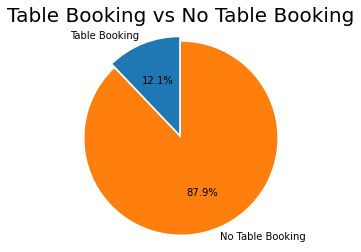

In [39]:
labels = 'Table Booking', 'No Table Booking'
values = [table_booking,table_booking_no]
plt.pie(values,labels=labels,autopct='%0.1f%%',explode=[0,0.1],startangle=90,radius=2)
plt.axis("equal")
plt.title("Table Booking vs No Table Booking",fontsize=20)
plt.show()

# Online Delivery (NO) Vs. No Online Delivery (NOD)

In [40]:
rest_copy_OD = rest_copy[rest_copy['Has_Online_delivery_Yes'] == 1]['Restaurant_ID'].count()
rest_copy_OD

2451

In [41]:
rest_copy_NOD = rest_copy[rest_copy['Has_Online_delivery_Yes'] == 0]['Restaurant_ID'].count()
rest_copy_NOD

7099

In [42]:
print('Percentage of restaurants providing online delivery : {} %'.format((round(rest_copy_OD/len(rest_copy),3)*100)))

Percentage of restaurants providing online delivery : 25.7 %


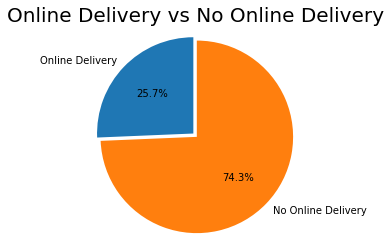

In [43]:
labels = 'Online Delivery', 'No Online Delivery '
values = [rest_copy_OD,rest_copy_NOD]
plt.pie(values,labels=labels,autopct='%0.1f%%',explode=[0,0.1],startangle=90,radius=2)
plt.axis("equal")
plt.title("Online Delivery vs No Online Delivery",fontsize=20)
plt.show()

### Difference in number of votes for the restaurants that deliver and the restaurants that do not deliver

In [44]:
rest_copy_del_vot = rest_copy[rest_copy['Has_Online_delivery_Yes'] == 1]['Votes'].sum()
rest_copy_del_vot

517914

In [45]:
rest_copy_NOdel_vot = rest_copy[rest_copy['Has_Online_delivery_Yes'] == 0]['Votes'].sum()
rest_copy_NOdel_vot

979962

In [46]:
print('Difference in number of votes for restaurants that deliver and dont deliver: ',
    abs((rest_copy_del_vot - rest_copy_NOdel_vot)))

Difference in number of votes for restaurants that deliver and dont deliver:  462048


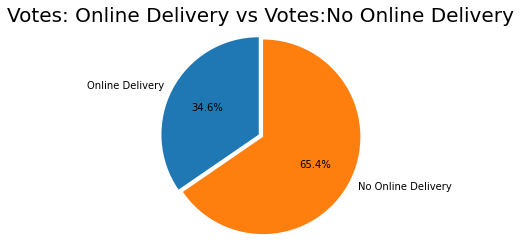

In [47]:
labels = 'Online Delivery', 'No Online Delivery '
values = [rest_copy_del_vot,rest_copy_NOdel_vot]
plt.pie(values,labels=labels,autopct='%0.1f%%',explode=[0,0.1],startangle=90,radius=2)
plt.axis("equal")
plt.title("Votes: Online Delivery vs Votes:No Online Delivery",fontsize=20)
plt.show()

## Analyzing the Cuisines column.

In [48]:
df_restaurants["Cuisines"].unique()

array(['Italian, Continental', 'Asian, Indonesian, Western',
       'Sushi, Japanese', ...,
       'Cafe, Italian, Mexican, North Indian, Continental',
       'Indian, Chinese, Continental',
       'Cafe, Continental, Desserts, Ice Cream, Italian, Beverages'],
      dtype=object)

In [49]:
df_restaurants.columns
cuisines = df_restaurants['Cuisines'].apply(lambda x: pd.Series(x.split(',')))

In [50]:
cuisines

,0,1,2,3,4,5,6,7
0,Italian,Continental,NaN,NaN,NaN,NaN,NaN,NaN
1,Asian,Indonesian,Western,NaN,NaN,NaN,NaN,NaN
2,Sushi,Japanese,NaN,NaN,NaN,NaN,NaN,NaN
3,Japanese,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,French,Western,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
9546,Chinese,North Indian,Fast Food,NaN,NaN,NaN,NaN,NaN
9547,Indian,Chinese,Continental,NaN,NaN,NaN,NaN,NaN
9548,Cafe,Continental,Desserts,Ice Cream,Italian,Beverages,NaN,NaN
9549,Street Food,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
cuisines.columns = ['Cuisine_1','Cuisine_2','Cuisine_3','Cuisine_4','Cuisine_5','Cuisine_6','Cuisine_7','Cuisine_8']
cuisines.tail()

,Cuisine_1,Cuisine_2,Cuisine_3,Cuisine_4,Cuisine_5,Cuisine_6,Cuisine_7,Cuisine_8
9546,Chinese,North Indian,Fast Food,NaN,NaN,NaN,NaN,NaN
9547,Indian,Chinese,Continental,NaN,NaN,NaN,NaN,NaN
9548,Cafe,Continental,Desserts,Ice Cream,Italian,Beverages,NaN,NaN
9549,Street Food,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9550,Chinese,North Indian,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
df_cuisines = pd.concat([df_restaurants,cuisines],axis=1)
df_cuisines.head()

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,...,Votes,Country,Cuisine_1,Cuisine_2,Cuisine_3,Cuisine_4,Cuisine_5,Cuisine_6,Cuisine_7,Cuisine_8
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",...,1498,Indonesia,Italian,Continental,NaN,NaN,NaN,NaN,NaN,NaN
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",...,873,Indonesia,Asian,Indonesian,Western,NaN,NaN,NaN,NaN,NaN
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",...,605,Indonesia,Sushi,Japanese,NaN,NaN,NaN,NaN,NaN,NaN
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,...,395,Indonesia,Japanese,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",...,243,Indonesia,French,Western,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
cuisine_locality = pd.DataFrame(df_cuisines[['Country','City','Locality_Verbose','Cuisine_1','Cuisine_2','Cuisine_3',
                                        'Cuisine_4','Cuisine_5','Cuisine_6','Cuisine_7','Cuisine_8']])

In [54]:
cuisine_locality.head()

,Country,City,Locality_Verbose,Cuisine_1,Cuisine_2,Cuisine_3,Cuisine_4,Cuisine_5,Cuisine_6,Cuisine_7,Cuisine_8
0,Indonesia,Jakarta,"Grand Indonesia Mall, Thamrin, Jakarta",Italian,Continental,NaN,NaN,NaN,NaN,NaN,NaN
1,Indonesia,Jakarta,"Hotel Shangri-La, Sudirman, Jakarta",Asian,Indonesian,Western,NaN,NaN,NaN,NaN,NaN
2,Indonesia,Jakarta,"Penjaringan, Jakarta",Sushi,Japanese,NaN,NaN,NaN,NaN,NaN,NaN
3,Indonesia,Jakarta,"Senopati, Jakarta",Japanese,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Indonesia,Jakarta,"Thamrin, Jakarta",French,Western,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
keys = [c for c in cuisine_locality  if c.startswith('Cuisine')]
melt_col=pd.melt(cuisine_locality, id_vars='Locality_Verbose', value_vars=keys, value_name='Cuisines') 
melt_col                                      # converting multiple cuisines column into single column

,Locality_Verbose,variable,Cuisines
0,"Grand Indonesia Mall, Thamrin, Jakarta",Cuisine_1,Italian
1,"Hotel Shangri-La, Sudirman, Jakarta",Cuisine_1,Asian
2,"Penjaringan, Jakarta",Cuisine_1,Sushi
3,"Senopati, Jakarta",Cuisine_1,Japanese
4,"Thamrin, Jakarta",Cuisine_1,French
...,...,...,...
76395,"Jakhan, Dehradun",Cuisine_8,NaN
76396,"Mall Road, Kanpur",Cuisine_8,NaN
76397,"Parade, Kanpur",Cuisine_8,NaN
76398,"Dashaswmedh Road, Varanasi",Cuisine_8,NaN


In [56]:
cuis_count=pd.DataFrame(melt_col.groupby(by=['Locality_Verbose','variable','Cuisines']).size().reset_index())
cuis_count.head()                       

,Locality_Verbose,variable,Cuisines,0
0,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Cuisine_1,Cafe,1
1,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Cuisine_1,North Indian,1
2,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Cuisine_2,Beverages,1
3,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Cuisine_2,Mughlai,1
4,"12th Square Building, Banjara Hills, Hyderabad",Cuisine_1,Mughlai,1


In [57]:
cuis_count
del cuis_count['variable']
cuis_count.columns=['Locality_Verbose','Cuisines','Count']
cuis_count.head()

,Locality_Verbose,Cuisines,Count
0,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Cafe,1
1,"ILD Trade Centre Mall, Sohna Road, Gurgaon",North Indian,1
2,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Beverages,1
3,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Mughlai,1
4,"12th Square Building, Banjara Hills, Hyderabad",Mughlai,1


In [58]:
locality=cuis_count.sort_values('Count', ascending=False).groupby(by=['Locality_Verbose'],as_index=False).first()
locality.head()

,Locality_Verbose,Cuisines,Count
0,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Cafe,1
1,"12th Square Building, Banjara Hills, Hyderabad",Mughlai,1
2,"A Hotel, Gurdev Nagar, Ludhiana",Chinese,1
3,"ARSS Mall, Paschim Vihar, New Delhi",North Indian,1
4,"Aaya Nagar, New Delhi",Cuisine Varies,1


### Merging df_restaurants and cuis_count dataframe using inner join

In [59]:
rest_rating=cuis_count.merge(df_restaurants,left_on='Locality_Verbose',right_on='Locality_Verbose',how='inner')   #inner join to merge the two dataframe
df=pd.DataFrame(rest_rating[['Country','City','Locality_Verbose','Cuisines_x','Count']]) 
df.head()

,Country,City,Locality_Verbose,Cuisines_x,Count
0,India,Gurgaon,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Cafe,1
1,India,Gurgaon,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Cafe,1
2,India,Gurgaon,"ILD Trade Centre Mall, Sohna Road, Gurgaon",North Indian,1
3,India,Gurgaon,"ILD Trade Centre Mall, Sohna Road, Gurgaon",North Indian,1
4,India,Gurgaon,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Beverages,1


In [60]:
#making a dataframe of rating restaurant
country=rest_rating.sort_values('Count', ascending=False).groupby(by=['Country'],as_index=False).first()
country.head()

,Country,Locality_Verbose,Cuisines_x,Count,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,...,Cuisines_y,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes
0,Australia,"Tanunda, Tanunda",Modern Australian,1,16608059,1918 Bistro & Grill,14,Tanunda,"94 Murray St, Tanunda, SA",Tanunda,...,"Modern Australian, Australian",30,Dollar($),No,No,3,4.4,Green,Very Good,339
1,Brazil,"Ipanema, Rio de Janeiro",Brazilian,3,7300521,Balada Mix,30,Rio de Janeiro,"Rua AnÌ_bal de MendonÌ_a, 37, Ipanema, Rio de ...",Ipanema,...,"Brazilian, Healthy Food, Juices, Pizza",90,Brazilian Real(R$),No,No,3,4.6,Dark Green,Excellent,21
2,Canada,"Yorkton, Yorkton",Asian,1,16668008,Arigato Sushi,37,Yorkton,"14 Second Ave North, Yorkton, SK S3N 1G1",Yorkton,...,Asian,25,Dollar($),No,No,2,3.3,Orange,Average,26
3,India,"Connaught Place, New Delhi",North Indian,48,302310,South Indian Snacks,1,New Delhi,"Near Jantar Mantar Bus Stand, Jantar Mantar Ro...",Connaught Place,...,South Indian,300,Indian Rupees(Rs.),No,No,1,3.6,Yellow,Good,50
4,Indonesia,"Thamrin, Jakarta",Western,1,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,...,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243


In [61]:
#grouping the data by country ,city & locality
cntry_group=pd.DataFrame(country[['Country','City','Locality','Cuisines_x','Count']])
cntry_group.head()

,Country,City,Locality,Cuisines_x,Count
0,Australia,Tanunda,Tanunda,Modern Australian,1
1,Brazil,Rio de Janeiro,Ipanema,Brazilian,3
2,Canada,Yorkton,Yorkton,Asian,1
3,India,New Delhi,Connaught Place,North Indian,48
4,Indonesia,Jakarta,Thamrin,Western,1


In [62]:
#renaming the columns
cntry_group.columns=['Country','City','Locality','Cuisines','Number of restaurants in the country']

In [63]:
#sorting the restaurants on the basis of the number of restaurants in the country
cntry_grp_sort=cntry_group.sort_values('Number of restaurants in the country', ascending=False)
cntry_grp_sort.head(10)                #Top 10 cuisines served across cities

,Country,City,Locality,Cuisines,Number of restaurants in the country
3,India,New Delhi,Connaught Place,North Indian,48
14,United States,Dubuque,Dubuque,American,9
5,New Zealand,Wellington City,Te Aro,Cafe,5
1,Brazil,Rio de Janeiro,Ipanema,Brazilian,3
6,Phillipines,Pasig City,Kapitolyo,Filipino,2
8,Singapore,Singapore,"Marina Centre, Downtown Core",Seafood,2
9,South Africa,Sandton,Bryanston,Contemporary,2
10,Sri Lanka,Colombo,"Kollupitiya, Colombo 03",Desserts,2
11,Turkey,Ankara,Balgat,Kebab,2
12,UAE,Abu Dhabi,"Abu Dhabi Mall, Tourist Club Area (Al Zahiyah)",American,2


## <font color=green>__North Indian Cuisine is the most reserved cuisine__.</font>

In [65]:
rest_cuisine = pd.DataFrame(df_cuisines[['Restaurant_Name','City','Cuisine_1','Cuisine_2','Cuisine_3','Cuisine_4',
                                         'Cuisine_5','Cuisine_6','Cuisine_7','Cuisine_8']])

In [66]:
rest_cuisine.head()

,Restaurant_Name,City,Cuisine_1,Cuisine_2,Cuisine_3,Cuisine_4,Cuisine_5,Cuisine_6,Cuisine_7,Cuisine_8
0,Skye,Jakarta,Italian,Continental,NaN,NaN,NaN,NaN,NaN,NaN
1,Satoo - Hotel Shangri-La,Jakarta,Asian,Indonesian,Western,NaN,NaN,NaN,NaN,NaN
2,Sushi Masa,Jakarta,Sushi,Japanese,NaN,NaN,NaN,NaN,NaN,NaN
3,3 Wise Monkeys,Jakarta,Japanese,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Avec Moi Restaurant and Bar,Jakarta,French,Western,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
keys1 = [c for c in rest_cuisine  if c.startswith('Cuisine')]
melt_col_new=pd.melt(rest_cuisine, id_vars='Restaurant_Name', value_vars=keys, value_name='Cuisines') 
melt_col_new.head()                                                     # converting cuisines columns into rows

,Restaurant_Name,variable,Cuisines
0,Skye,Cuisine_1,Italian
1,Satoo - Hotel Shangri-La,Cuisine_1,Asian
2,Sushi Masa,Cuisine_1,Sushi
3,3 Wise Monkeys,Cuisine_1,Japanese
4,Avec Moi Restaurant and Bar,Cuisine_1,French


In [68]:
cuis_count_1=pd.DataFrame(melt_col_new.groupby(by=['Restaurant_Name','variable','Cuisines']).size().reset_index())
cuis_count_1

,Restaurant_Name,variable,Cuisines,0
0,12212,Cuisine_1,Fast Food,1
1,Let's Burrrp,Cuisine_1,Chinese,1
2,Let's Burrrp,Cuisine_2,North Indian,1
3,#45,Cuisine_1,Cafe,1
4,#Dilliwaala6,Cuisine_1,North Indian,1
...,...,...,...,...
15959,{Niche} - Cafe & Bar,Cuisine_2,Chinese,1
15960,{Niche} - Cafe & Bar,Cuisine_3,Italian,1
15961,{Niche} - Cafe & Bar,Cuisine_4,Continental,1
15962,Ìàukura€Ùa Sofras€±,Cuisine_1,Kebab,1


In [69]:
cuis_count_1
del cuis_count_1['variable']
cuis_count_1.columns=['Restaurant_Name','Cuisines','Count']
cuis_count_1.head(20)

,Restaurant_Name,Cuisines,Count
0,12212,Fast Food,1
1,Let's Burrrp,Chinese,1
2,Let's Burrrp,North Indian,1
3,#45,Cafe,1
4,#Dilliwaala6,North Indian,1
5,#InstaFreeze,Ice Cream,1
6,#OFF Campus,Cafe,1
7,#OFF Campus,Continental,1
8,#OFF Campus,Italian,1
9,#OFF Campus,Fast Food,1


In [70]:
cuis_count_1.sort_values('Count',ascending=False)

,Restaurant_Name,Cuisines,Count
2479,Cafe Coffee Day,Cafe,83
4596,Domino's Pizza,Pizza,79
4597,Domino's Pizza,Fast Food,78
12984,Subway,Salad,63
12985,Subway,Healthy Food,63
...,...,...,...
5568,Gabbar's Bar & Kitchen,Chinese,1
5569,Gabbar's Bar & Kitchen,Mexican,1
5570,Gabbar's Bar & Kitchen,Italian,1
5571,Gaga Manjero,World Cuisine,1


## <font color=green>So Cafe Coffee Day has the maximum number of cuisines and <br> the least number of cuisines in a restaurant is 1.</font>

In [71]:
df_restaurants.columns

Index(['Restaurant_ID', 'Restaurant_Name', 'Country_Code', 'City', 'Address',
       'Locality', 'Locality_Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average_Cost_for_two', 'Currency', 'Has_Table_booking',
       'Has_Online_delivery', 'Price_range', 'Aggregate_rating',
       'Rating_color', 'Rating_text', 'Votes', 'Country'],
      dtype='object')

In [72]:
df_new=rest_copy[["Aggregate_rating","Votes","Currency","Average_Cost_for_two","Price_range","Has_Table_booking_Yes","Has_Online_delivery_Yes"]]

In [73]:
df_new.head()

,Aggregate_rating,Votes,Currency,Average_Cost_for_two,Price_range,Has_Table_booking_Yes,Has_Online_delivery_Yes
0,4.1,1498,Indonesian Rupiah(IDR),800000,3,0,0
1,4.6,873,Indonesian Rupiah(IDR),800000,3,0,0
2,4.9,605,Indonesian Rupiah(IDR),500000,3,0,0
3,4.2,395,Indonesian Rupiah(IDR),450000,3,0,0
4,4.3,243,Indonesian Rupiah(IDR),350000,3,0,0


In [74]:
df_new.corr()

,Aggregate_rating,Votes,Average_Cost_for_two,Price_range,Has_Table_booking_Yes,Has_Online_delivery_Yes
Aggregate_rating,1.000000,0.313598,0.051797,0.437874,0.190045,0.225772
Votes,0.313598,1.000000,0.067794,0.309308,0.169497,0.074399
Average_Cost_for_two,0.051797,0.067794,1.000000,0.075093,0.007757,-0.018976
Price_range,0.437874,0.309308,0.075093,1.000000,0.502025,0.078007
Has_Table_booking_Yes,0.190045,0.169497,0.007757,0.502025,1.000000,0.101204
Has_Online_delivery_Yes,0.225772,0.074399,-0.018976,0.078007,0.101204,1.000000


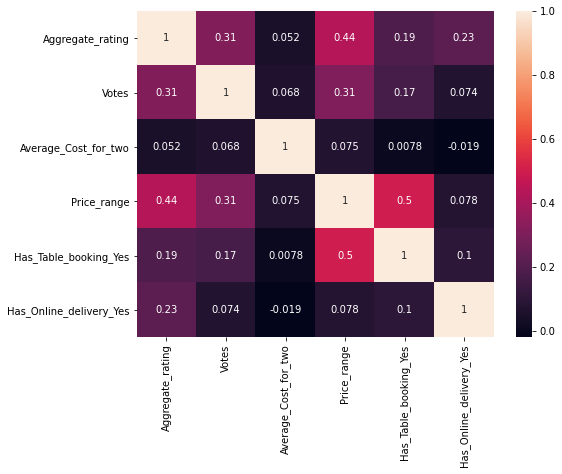

In [75]:
plt.figure(figsize=(8,6))
sns.heatmap(df_new.corr(),annot=True)
plt.show()

In [76]:
# The above heat-map shows the relation between all continous variables.

## <font color=green> Votes, Price Range, Table-Booking and Online Delivery have some impact on Ratings. </font>

## Data Visualization performed using Tableau:
### https://public.tableau.com/app/profile/ajit8688/viz/IdentifyingBestRestaurants/IdentifyingBestRestaurantsDB